## COMP 6934 Winter 2025 In class Work 2

We're duplicating some of the charting ideas from note 2, but using a stored data set unstead of generating data distributions with numpy.

The dataset is taken from <https://www.kaggle.com/datasets/jash312/canada-daily-weather-data-from-2018-to-2023>

That data set is sourced from environment canada's postings, but I am a little concerned some of the data rows has the M flags set and missing rainfall data. I'm wondering if the data was cleaned correctly. For now, I'm ignoring thows data records and will let you know if I gigure them out.

It demonstrates some additional matplotlib settings that are not shown in the previous tutorial in note 1.

If the numpy library is not aleady installed, you may need to install it.

First, I grab the data from a csv format file into the familiar list-of-dictionaries fromat using a method from the standard csv python library:

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [24]:
from csv import DictReader

In [25]:
with open('Data/NL_combined_weather_data.csv') as csvfile:
    reader = DictReader(csvfile)
    alldata = list(reader) # don't exceed your memory limits!
print(alldata[:5]) # first 5 data values

[{'Longitude (x)': '-53.99', 'Latitude (y)': '47.29', 'Station Name': 'ARGENTIA (AUT)', 'Climate ID': '8400104', 'Date/Time': '2022-07-22', 'Year': '2022', 'Month': '7', 'Day': '22', 'Data Quality': '', 'Max Temp (Â°C)': '', 'Max Temp Flag': 'M', 'Min Temp (Â°C)': '', 'Min Temp Flag': 'M', 'Mean Temp (Â°C)': '', 'Mean Temp Flag': 'M', 'Heat Deg Days (Â°C)': '', 'Heat Deg Days Flag': 'M', 'Cool Deg Days (Â°C)': '', 'Cool Deg Days Flag': 'M', 'Total Rain (mm)': '', 'Total Rain Flag': '', 'Total Snow (cm)': '', 'Total Snow Flag': '', 'Total Precip (mm)': '', 'Total Precip Flag': 'M', 'Snow on Grnd (cm)': '', 'Snow on Grnd Flag': '', 'Dir of Max Gust (10s deg)': '', 'Dir of Max Gust Flag': 'M', 'Spd of Max Gust (km/h)': '', 'Spd of Max Gust Flag': 'M'}, {'Longitude (x)': '-53.99', 'Latitude (y)': '47.29', 'Station Name': 'ARGENTIA (AUT)', 'Climate ID': '8400104', 'Date/Time': '2022-07-23', 'Year': '2022', 'Month': '7', 'Day': '23', 'Data Quality': '', 'Max Temp (Â°C)': '19.9', 'Max Temp Fl

In [26]:
alldata[0].keys()

dict_keys(['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID', 'Date/Time', 'Year', 'Month', 'Day', 'Data Quality', 'Max Temp (Â°C)', 'Max Temp Flag', 'Min Temp (Â°C)', 'Min Temp Flag', 'Mean Temp (Â°C)', 'Mean Temp Flag', 'Heat Deg Days (Â°C)', 'Heat Deg Days Flag', 'Cool Deg Days (Â°C)', 'Cool Deg Days Flag', 'Total Rain (mm)', 'Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag', 'Total Precip (mm)', 'Total Precip Flag', 'Snow on Grnd (cm)', 'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)', 'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)', 'Spd of Max Gust Flag'])

In [27]:
len(alldata)


99657

That's too many data points for a standard plot. So I'll use the standard python filter method to futher reduce the list to obsercvation taken at the St. John's Airport 

In [28]:
stja_data =  list(filter(lambda item: "ST. JOHN'S INTL A" in item['Station Name'] , alldata))
len(stja_data)

2191

That's still to many. Let's use Jan 2020 data:

In [29]:
j2020_data =  list(filter(lambda item: "2020" in item['Year'] and "1" == item["Month"], stja_data))
len(j2020_data)

31

In [30]:
j2020_data[0].keys()


dict_keys(['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID', 'Date/Time', 'Year', 'Month', 'Day', 'Data Quality', 'Max Temp (Â°C)', 'Max Temp Flag', 'Min Temp (Â°C)', 'Min Temp Flag', 'Mean Temp (Â°C)', 'Mean Temp Flag', 'Heat Deg Days (Â°C)', 'Heat Deg Days Flag', 'Cool Deg Days (Â°C)', 'Cool Deg Days Flag', 'Total Rain (mm)', 'Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag', 'Total Precip (mm)', 'Total Precip Flag', 'Snow on Grnd (cm)', 'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)', 'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)', 'Spd of Max Gust Flag'])

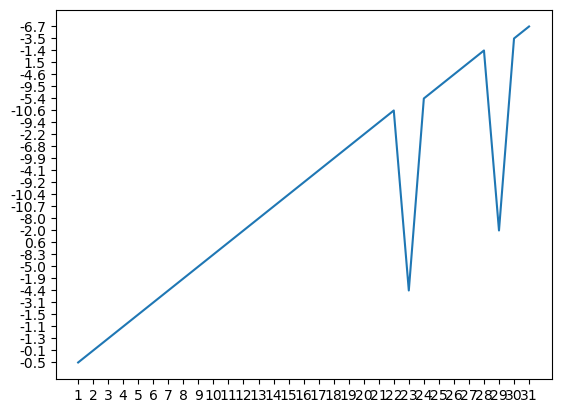

In [31]:
import matplotlib.pyplot as plt

days = [r['Day'] for r in j2020_data]
temp = [r['Mean Temp (Â°C)'] for r in j2020_data]
plt.plot(days,temp)
plt.show()

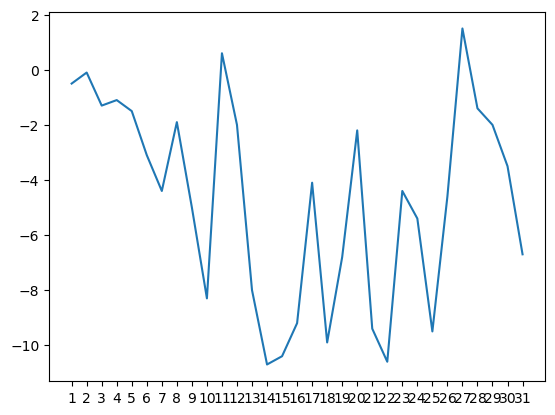

In [32]:
temp_nums = [float(r['Mean Temp (Â°C)']) for r in j2020_data]
plt.plot(days,temp_nums)
plt.show()

### Summary data

Selecting a range of data is pretty easy with list comprehensions, but reducing data by summarizing takes a little more work.

Let's sum and average some data for each month of 2020 from the St. John's Airport weather station.


In [33]:
avg_temp = [0]*12
tot_rain = [0]*12
days_count = [0]*12

def floatOrZ(val):
    try:
        return float(val)
    except ValueError:
        return 0.0
    
for rec in stja_data:
    if rec['Year'] != "2020": continue;
    tot_rain[int(rec['Month']) -1] += floatOrZ(rec['Total Precip (mm)'])
    avg_temp[int(rec['Month']) -1] += floatOrZ(rec['Mean Temp (Â°C)'])
    days_count[int(rec['Month']) -1] += 1

avg_temp = [temp/days for (temp,days) in zip(avg_temp,days_count)]

print(avg_temp,tot_rain,days_count)

[-4.7064516129032254, -4.1000000000000005, -2.9838709677419355, 1.2533333333333334, 6.645161290322581, 13.826666666666672, 13.558064516129031, 17.370967741935484, 14.256666666666668, 8.66451612903226, 3.3200000000000003, 2.0225806451612907] [134.79999999999998, 91.80000000000001, 139.4, 98.89999999999999, 96.0, 154.09999999999997, 180.4, 135.79999999999998, 100.10000000000001, 131.3, 130.89999999999998, 165.79999999999998] [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]


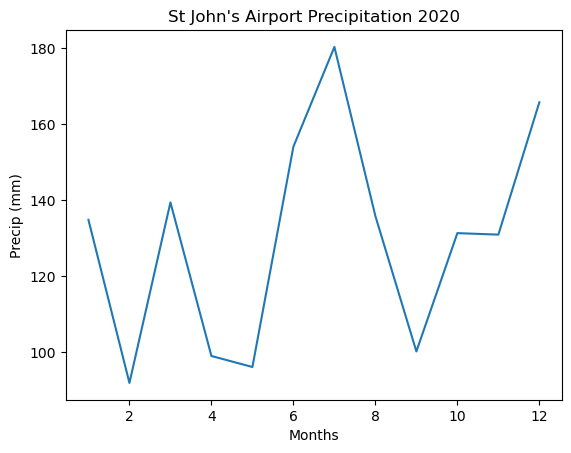

In [34]:
plt.plot(range(1,13), tot_rain)
plt.title("St John's Airport Precipitation 2020")
plt.xlabel('Months')
plt.ylabel('Precip (mm)')
plt.show()


## In-Class Problem Set #2





#### Problem 2.1

Read data for TORONTO CITY weather station from the ontario data file (ON_combined) and add a plot line for rainfall to the previous plot. Add new cell(s) below for this new plot. 

The notes do not show you how to add a legend for the two different lines, you can research and add this if you want an extra challenge.

In [35]:
with open('Data/ON_combined_weather_data.csv') as csvfile:
    reader = DictReader(csvfile)
    alldata = list(reader) # don't exceed your memory limits!
print(alldata[:5]) # first 5 data values

[{'Longitude (x)': '-82.43', 'Latitude (y)': '52.93', 'Station Name': 'ATTAWAPISKAT A', 'Climate ID': '6010400', 'Date/Time': '2018-01-01', 'Year': '2018', 'Month': '1', 'Day': '1', 'Data Quality': '', 'Max Temp (Â°C)': '-18.8', 'Max Temp Flag': '', 'Min Temp (Â°C)': '-34.4', 'Min Temp Flag': '', 'Mean Temp (Â°C)': '-26.6', 'Mean Temp Flag': '', 'Heat Deg Days (Â°C)': '44.6', 'Heat Deg Days Flag': '', 'Cool Deg Days (Â°C)': '0.0', 'Cool Deg Days Flag': '', 'Total Rain (mm)': '', 'Total Rain Flag': 'M', 'Total Snow (cm)': '', 'Total Snow Flag': 'M', 'Total Precip (mm)': '0.0', 'Total Precip Flag': '', 'Snow on Grnd (cm)': '', 'Snow on Grnd Flag': '', 'Dir of Max Gust (10s deg)': '', 'Dir of Max Gust Flag': 'M', 'Spd of Max Gust (km/h)': '', 'Spd of Max Gust Flag': 'M'}, {'Longitude (x)': '-82.43', 'Latitude (y)': '52.93', 'Station Name': 'ATTAWAPISKAT A', 'Climate ID': '6010400', 'Date/Time': '2018-01-02', 'Year': '2018', 'Month': '1', 'Day': '2', 'Data Quality': '', 'Max Temp (Â°C)': '

In [36]:
trnt_data =  list(filter(lambda item: "TORONTO CITY" in item['Station Name'] , alldata))
len(trnt_data)

4382

In [37]:
t2020_data =  list(filter(lambda item: "2020" in item['Year'] and "1" == item["Month"], trnt_data))
len(t2020_data)

62

In [38]:
avg_temp = [0]*12
tot_rain_trnt = [0]*12
days_count = [0]*12

def floatOrZ(val):
    try:
        return float(val)
    except ValueError:
        return 0.0
    
for rec in trnt_data:
    if rec['Year'] != "2020": continue;
    tot_rain_trnt[int(rec['Month']) -1] += floatOrZ(rec['Total Precip (mm)'])
    avg_temp[int(rec['Month']) -1] += floatOrZ(rec['Mean Temp (Â°C)'])
    days_count[int(rec['Month']) -1] += 1

avg_temp = [temp/days for (temp,days) in zip(avg_temp,days_count)]

print(avg_temp,tot_rain,days_count)

[-0.5161290322580644, -1.9000000000000004, 3.6193548387096777, 6.318333333333336, 12.014516129032257, 19.63666666666666, 24.71129032258064, 21.70967741935484, 17.286666666666665, 9.625806451612904, 7.223333333333332, 0.7403225806451617] [134.79999999999998, 91.80000000000001, 139.4, 98.89999999999999, 96.0, 154.09999999999997, 180.4, 135.79999999999998, 100.10000000000001, 131.3, 130.89999999999998, 165.79999999999998] [62, 58, 62, 60, 62, 60, 62, 62, 60, 62, 60, 62]


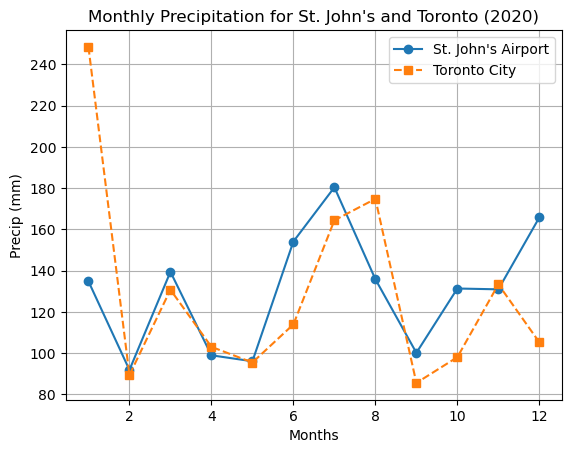

In [39]:
plt.plot(range(1,13),tot_rain,label="St. John's Airport", linestyle='-', marker='o')
plt.plot(range(1,13), tot_rain_trnt,label="Toronto City", linestyle='--', marker='s')
plt.title("Monthly Precipitation for St. John's and Toronto (2020)")
plt.xlabel('Months')
plt.ylabel('Precip (mm)')
plt.legend()
plt.grid(True)
plt.show()

#### Problem 2.2

The notes show contruction of a scatter plot. Construct a scatter plot that shows temperature data across 12 months of 2020, (St. John's) and make the size of the circles proportional to the precipitation for the month. In other words, we are using actual data and not randomly genearted data.

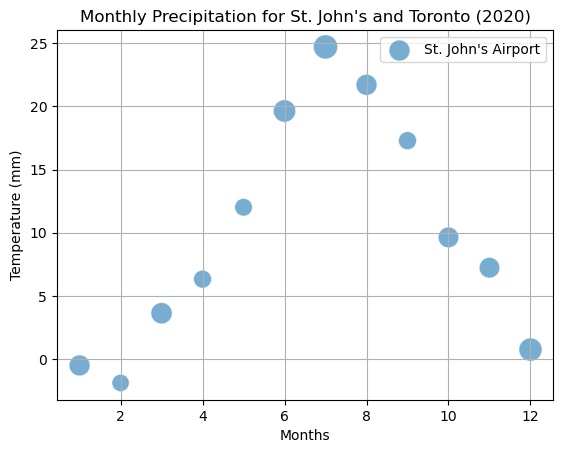

In [40]:
# Normalize precipitation data to scale circle sizes
max_precip = max(tot_rain) if tot_rain else 1
scaled_sizes = [precip / max_precip * 300 for precip in tot_rain]
# Plot the monthly precipitation for St. John's and Toronto

months = range(1, 13)
plt.scatter(months, avg_temp, label="St. John's Airport", s=scaled_sizes, alpha=0.6, edgecolors="w", linewidth=0.5)
#plt.plot(months, tot_rain_trnt, label="Toronto City", linestyle='--', marker='s' linestyle='-', marker='o')

# Customize the plot with titles, labels, and legend
plt.title("Monthly Precipitation for St. John's and Toronto (2020)")
plt.xlabel("Months")
plt.ylabel("Temperature (mm)")
plt.legend()
plt.grid(True)
plt.show()

#### Problem 2.3

Modify the scatter plot so that data points for negative temperatures are shown in blue and positive tempartures result in a red circle. Create a new cell for the new plot.

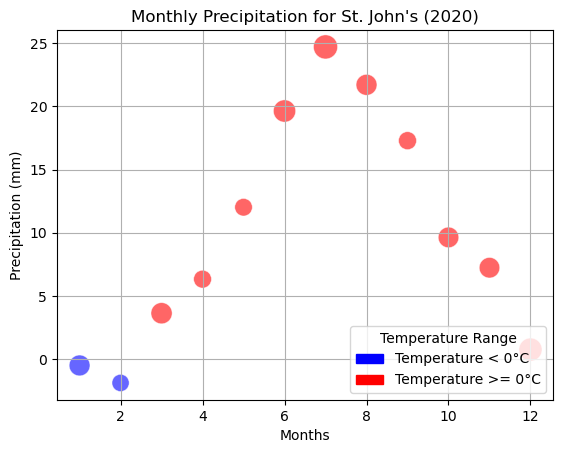

In [41]:
import matplotlib.patches as mpatches

# Plot the monthly precipitation for St. John's and Toronto with color-coded temperatures
months = range(1, 13)
colors = ['blue' if temp < 0 else 'red' for temp in avg_temp]

plt.scatter(months, avg_temp, label="St. John's Airport", s=scaled_sizes, c=colors, alpha=0.6, edgecolors="w", linewidth=0.5)
#plt.plot(months, toronto_precip_2020, label="Toronto City", linestyle='--', marker='s')

# Add legend for colors
blue_patch = mpatches.Patch(color='blue', label='Temperature < 0°C')
red_patch = mpatches.Patch(color='red', label='Temperature >= 0°C')
plt.legend(handles=[blue_patch, red_patch], loc='lower right', title="Temperature Range")

# Customize the plot with titles, labels, and legend
plt.title("Monthly Precipitation for St. John's (2020)")
plt.xlabel("Months")
plt.ylabel("Precipitation (mm)")
#plt.legend()
plt.grid(True)
plt.show()


#### Problem 2.4

Some of the temperature data is missing (blank) in the data file. The existing summary code will include these as zero values when average the temperature, which is incorrect. This helps explain why the average temperature is showing so low in the summer months.

Fix the summary calculation by modifying the code to omit records with blank temperature values. Note that you will have to adjust the days_count as well in order to correct the average temperature calculation.

Create new cells to re-plot the results with the corrected summary data.

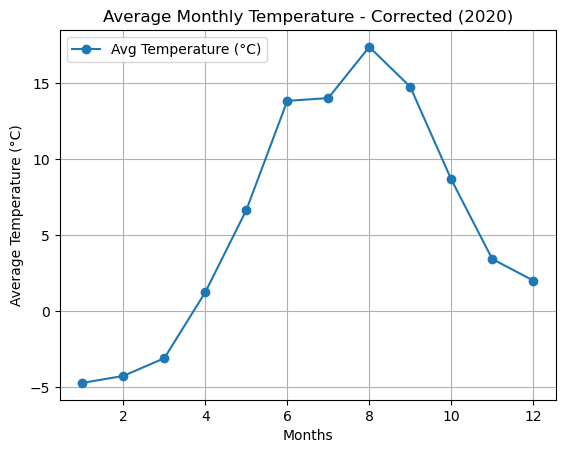

In [42]:

avg_temp = [0]*12
tot_rain = [0]*12
days_count = [0]*12

def floatOrNone(val):
    try:
        return float(val)
    except ValueError:
        return None

for rec in stja_data:
    if rec['Year'] == "2020":
        m = int(rec['Month']) - 1
        temp_value = floatOrNone(rec['Mean Temp (Â°C)'])
        if temp_value is not None:  # Only consider valid temperature values
            avg_temp[m] += temp_value
            days_count[m] += 1
        tot_rain[m] += floatOrNone(rec['Total Precip (mm)']) or 0.0  # Handle missing precipitation
        
avg_temp = [total/days if days > 0 else None for total, days in zip(avg_temp, days_count)]

# Re-plot the updated results
plt.plot(range(1, 13), avg_temp, marker='o', label='Avg Temperature (°C)')
plt.title("Average Monthly Temperature - Corrected (2020)")
plt.xlabel('Months')
plt.ylabel('Average Temperature (°C)')
plt.grid()
plt.legend()
plt.show()
